In [50]:
#load the required libraries
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [51]:
#reading the csv file
bbazar = pd.read_excel('bigbazar_dataset.xlsx')

In [52]:
bbazar.head(3)

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,1975-10-20 00:00:00,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,1955-07-21 00:00:00,female,NaN,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,1981-03-19 00:00:00,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback


In [53]:
print(bbazar.dtypes)

customerID                            object
DOB                                   object
Gender                                object
State                                 object
PinCode                              float64
transactionDate               datetime64[ns]
store_code                             int64
store_description                     object
till_no                                int64
transaction_number_by_till             int64
promo_code                            object
promotion_description                 object
product_code                           int64
product_description                   object
sale_price_after_promo               float64
discountUsed                          object
dtype: object


### Using only Transaction date and Sales coulmn to build our time series model

In [54]:
grouping_dates = ((bbazar[['transactionDate','sale_price_after_promo']]).groupby('transactionDate').sum())

In [36]:
grouping_dates.to_csv( 'time_series_data_bbazar.csv', sep=',')

In [55]:
grouping_dates.index

DatetimeIndex(['2015-05-01', '2015-05-02', '2015-05-03', '2015-05-04',
               '2015-05-05', '2015-05-06', '2015-05-07', '2015-05-08',
               '2015-05-09', '2015-05-10',
               ...
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='transactionDate', length=790, freq=None)

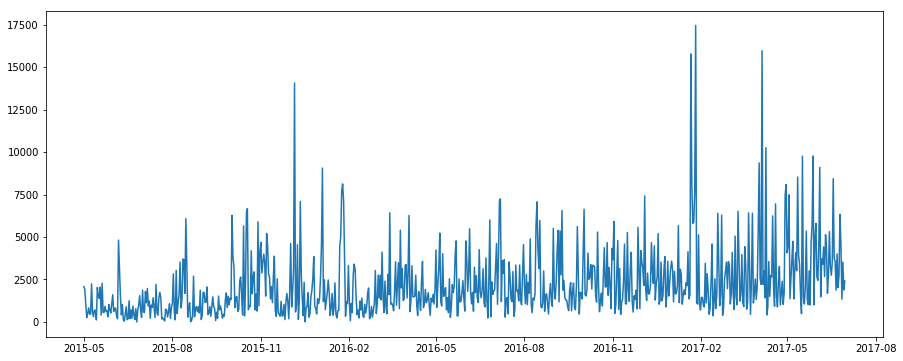

In [56]:
plt.plot(grouping_dates)

### estimating trend and eliminating it

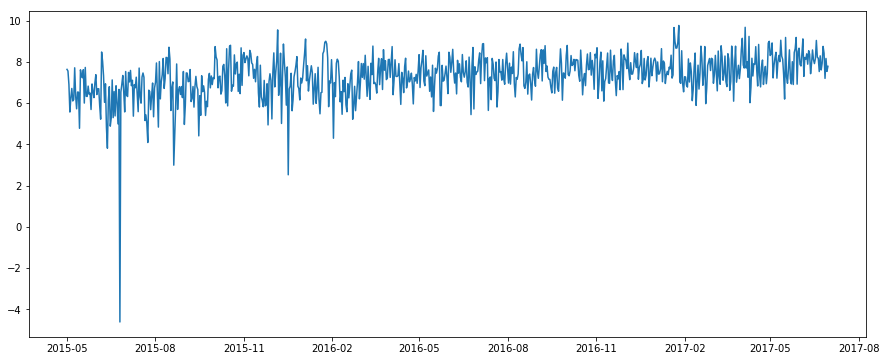

In [57]:
grouping_dates_log = np.log(grouping_dates)
plt.plot(grouping_dates_log)
#the data has more noise than trend